In [46]:
from config import api_key
from yelpapi import YelpAPI
import requests
import pandas as pd
import numpy as np
import random
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from matplotlib import colors
from pprint import pprint

In [47]:
cities = ["Anaheim", "Santa Ana", "Irvine", "Tustin", "Garden Grove", "Orange", "Fullerton", "Costa Mesa", "Cypress", "Westminster"]
url = "https://api.yelp.com/v3/businesses/search"
headers = {'Authorization': 'Bearer %s' %api_key}
business_id = []
for c in cities: #since the search limit is 50, we set the radius about 3 miles
    params = {'term':"restaurant" ,"location": c,"limit": 50,"radius": 5000}
    responses = requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        business_id.append(response["id"])
        


In [48]:
yelp_api = YelpAPI(api_key)
responses = []
for b in business_id:
    responses.append(yelp_api.business_query(id = b))   

In [49]:
dates_time = []
ratings = []
for r in responses:
    try:
        dates_time.append(r["hours"][0]["open"])
        ratings.append(r["rating"])
    except KeyError: #some stores didn't list out operation hours
        continue

In [50]:
total_hours = []
for date_time in dates_time:
    total = 0
    for x in range(len(date_time)):
        if int(date_time[x]["end"]) == 0:
            total += 2400-int(date_time[x]["start"])
        elif int(date_time[x]["end"]) < 600:
#             print(date_time[x]["day"])
            total += int(date_time[x]["end"])+2400 - int(date_time[x]["start"])
        else:
            total += int(date_time[x]["end"])-int(date_time[x]["start"])
            if total < 0:
                print(total)
                print(date_time[x]["end"])
    total_hours.append(round(total/100)) #sum of operation hours
    


In [51]:
print(len(ratings))
print(len(total_hours))

493
493


In [52]:
business_id2 = []
for c2 in cities:
    params = {'term':"restaurant" ,"location": c2,"limit": 50,"offset":50,"radius": 5000,}
    responses = requests.get(url,headers = headers, params = params).json()
    for response in responses["businesses"]:
        business_id2.append(response["id"])

In [53]:
yelp_api = YelpAPI(api_key)
responses2 = []
for b2 in business_id2:
    responses2.append(yelp_api.business_query(id = b2))  

In [54]:
dates_time2 = []
# ratings2=[]
for r2 in responses2:
    try:
        dates_time2.append(r2["hours"][0]["open"])
        ratings.append(r2["rating"])
    except KeyError: #some stores didn't list out operation hours
        continue


In [55]:
pprint(dates_time2)

[[{'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 6, 'end': '2200', 'is_overnight': False, 'start': '1100'}],
 [{'day': 0, 'end': '1500', 'is_overnight': False, 'start': '1100'},
  {'day': 0, 'end': '2130', 'is_overnight': False, 'start': '1700'},
  {'day': 1, 'end': '1500', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2130', 'is_overnight': False, 'start': '1700'},
  {'day': 2, 'end': '1500', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2130', 'is_overnight': False, 'start': '1700'},
  {'day': 3, 'end': '1500', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2130', 'is_o

  {'day': 6, 'end': '2200', 'is_overnight': False, 'start': '1100'}],
 [{'day': 0, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1700'},
  {'day': 1, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1700'},
  {'day': 2, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2200', 'is_overnight': False, 'start': '1700'},
  {'day': 3, 'end': '1430', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2200', 'is_overnight': False, 'start': '1700'},
  {'day': 4, 'end': '2230', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2230', 'is_overnight': False, 'start': '1130'},
  {'day': 6, 'end': '2200', 'is_overnight': False, 'start': '1130'}],
 [{'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2200', 'is_

  {'day': 3, 'end': '2100', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2100', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2100', 'is_overnight': False, 'start': '1000'},
  {'day': 6, 'end': '2100', 'is_overnight': False, 'start': '1000'}],
 [{'day': 0, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 1, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '2200', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '2300', 'is_overnight': False, 'start': '1100'},
  {'day': 5, 'end': '2300', 'is_overnight': False, 'start': '1100'},
  {'day': 6, 'end': '2200', 'is_overnight': False, 'start': '1100'}],
 [{'day': 1, 'end': '1800', 'is_overnight': False, 'start': '1100'},
  {'day': 2, 'end': '1800', 'is_overnight': False, 'start': '1100'},
  {'day': 3, 'end': '1800', 'is_overnight': False, 'start': '1100'},
  {'day': 4, 'end': '1900', 'is_

In [56]:
# total_hours2=[]
for date_time2 in dates_time2:
    total = 0
    for x2 in range(len(date_time2)):
        if int(date_time2[x2]["end"]) == 0:
            total += 2400-int(date_time2[x2]["start"])
        elif int(date_time2[x2]["end"]) < 1000:
#             print(date_time[x]["day"])
            total += int(date_time2[x2]["end"])+2400 - int(date_time2[x2]["start"])
        else:
            total += int(date_time2[x2]["end"])-int(date_time2[x2]["start"])
            if total < 0:
                print(total)
                print(date_time2[x]["end"])
    total_hours.append(round(total/100)) #sum of operation hours
    

In [57]:
print(len(ratings))
print(len(total_hours))

974
974


In [58]:
hours_ratings = pd.DataFrame({"Hours": total_hours,
                             "Ratings": ratings})
hours_ratings

,Hours,Ratings
0,55,4.5
1,35,4.5
2,70,4.0
3,79,4.0
4,75,4.0
5,79,4.5
6,74,4.0
7,41,4.5
8,30,4.5
9,65,4.5


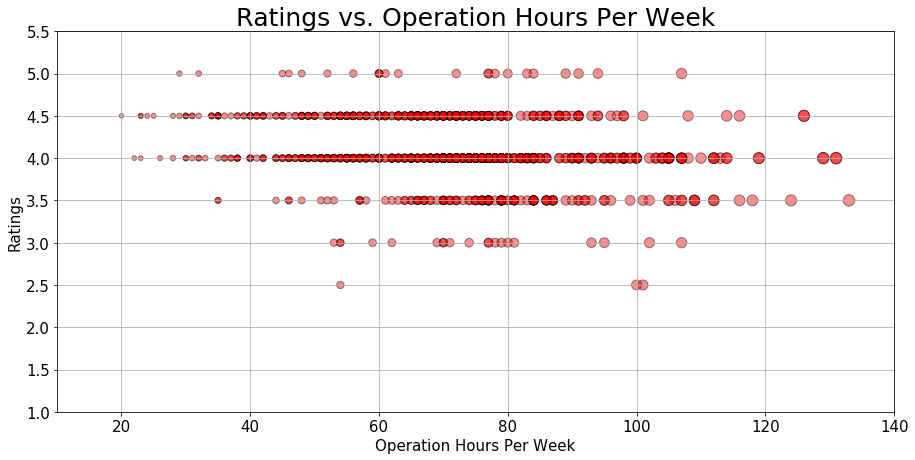

In [59]:
plt.figure(figsize=(15,7))
plt.scatter(total_hours, ratings, marker="o", facecolors="red", edgecolors="black",
            s=total_hours*25, alpha=0.45)

plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)

plt.title("Ratings vs. Operation Hours Per Week")
plt.xlabel("Operation Hours Per Week")
plt.ylabel("Ratings")
plt.grid(True)
plt.xlim([10, 140])
plt.ylim([1, 5.5])
plt.show()


In [60]:
group_by_rating = hours_ratings.groupby(['Ratings'])
avg_hours = group_by_rating.mean()
avg_hours

,Hours
Ratings,
2.5,85.000000
3.0,75.250000
3.5,81.367647
4.0,71.975560
4.5,64.470000
5.0,64.583333


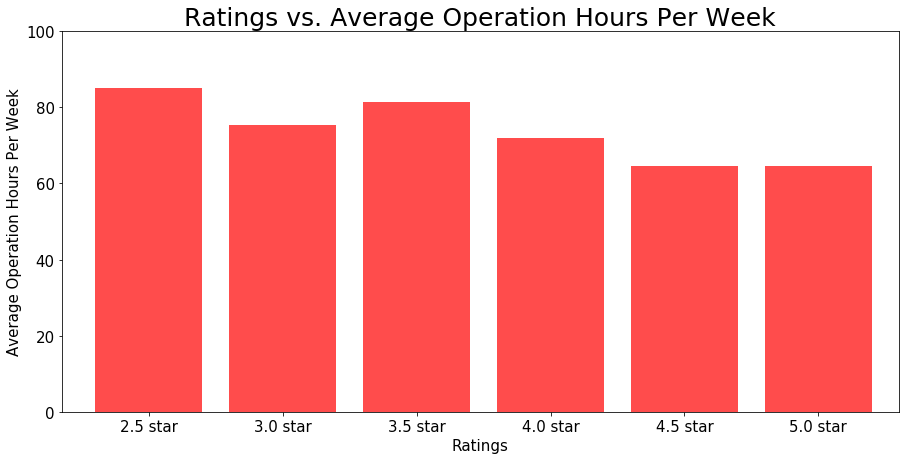

In [61]:
plt.figure(figsize=(15,7))
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)

stars = ["2.5 star", "3.0 star", "3.5 star", "4.0 star", "4.5 star", "5.0 star"]

x_axis = np.arange(len(avg_hours))
plt.bar(x_axis, avg_hours['Hours'], color='r', alpha=0.7, align='edge')


tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, stars)
plt.xlim(-0.25,len(x_axis))
plt.ylim(0, 100)

plt.title('Ratings vs. Average Operation Hours Per Week')
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Average Operation Hours Per Week', fontsize=15)
plt.legend()
plt.show()

